# Letter Recognition Using a Random Forest Model

### Objectives:

This notebook performs the following tasks:

1. **Data Loading and Preprocessing**:
   - Loads the Letter Recognition dataset from the UCI Machine Learning Repository.
   - Displays the dimensions of the features set and the target variable.
   - Previews the first few rows of the dataset.
   - Analyzes the unique classes and class distribution of the target variable.
   - Splits the dataset into training, validation, and test sets.
   

2. **Hyperparameter Tuning for `min_samples_split`, `max_depth`, and `n_estimators`**:
   - Defines a range of values for the `min_samples_split`, `max_depth`, and `n_estimators` hyperparameter.
   - Trains and evaluates a Random Forest model for each value of `min_samples_split`, `max_depth`, and `n_estimators`, recording accuracy and F1 scores for training and validation sets.
   - Plots the training and validation accuracy as well as F1 scores against different values of `min_samples_split`, `max_depth`, and `n_estimators`.

3. **Building the Optimal Random Forest Model**:
   - Trains the final Random Forest model using the optimal values obtained from hyperparameter tuning (`min_samples_split`, `max_depth`, and `n_estimators`).
   - Makes predictions on the training, validation, and test datasets.
   - Calculates and prints the accuracy and F1 scores for the trained model across all datasets.

4. **Conclusion**:
   - Summarizes the results, highlighting the best performing and balanced model based on evaluation metrics.
   - Completes the project of building a letter recognition Random Forest model.


### This project uses data from [UCI Machine Learning Repository](https://archive.ics.uci.edu/dataset/59/letter+recognition). This dataset is licensed under a [Creative Commons Attribution 4.0 International (CC BY 4.0) license](https://creativecommons.org/licenses/by/4.0/legalcode). The dataset was converted into numpy arrays for building a machine learning model.

In [2]:
import numpy as np
from ucimlrepo import fetch_ucirepo

# fetch dataset
letter_recognition = fetch_ucirepo(id=59)

# data (as pandas dataframes)
X = letter_recognition.data.features
y = letter_recognition.data.targets

# Print the dimensions of the features set (X) and the target variable (y)
print(X.shape, y.shape)

(20000, 16) (20000, 1)


In [3]:
# Display the first few rows of the features set (X)
X.head()

,x-box,y-box,width,high,onpix,x-bar,y-bar,x2bar,y2bar,xybar,x2ybr,xy2br,x-ege,xegvy,y-ege,yegvx
0,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10


In [4]:
# Display the first few entries of the target variable (y)
y.head()

,lettr
0,T
1,I
2,D
3,N
4,G


In [5]:
# Get the unique values in the target variable (y) along with their counts to understand class distribution
np.unique(y, return_counts=True)

(array(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M',
        'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z'],
       dtype=object),
 array([789, 766, 736, 805, 768, 775, 773, 734, 755, 747, 739, 761, 792,
        783, 753, 803, 783, 758, 748, 796, 813, 764, 752, 787, 786, 734]))

In [6]:
from sklearn.model_selection import train_test_split

# Convert X and y to numpy arrays for further processing
X = X.values
y = (np.searchsorted(np.unique(y), y) + 1).flatten()

# First split: Train + Validation and Test sets (70% for training/validation, 30% for test)
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Second split: Training and Validation sets (70% of train_val data for training, 30% for validation)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.3, random_state=42, stratify=y_train_val)

# Output the shapes of the data splits for verification
print("Training set shape:", X_train.shape, y_train.shape)
print("Validation set shape:", X_val.shape, y_val.shape)
print("Testing set shape:", X_test.shape, y_test.shape)

Training set shape: (9800, 16) (9800,)
Validation set shape: (4200, 16) (4200,)
Testing set shape: (6000, 16) (6000,)


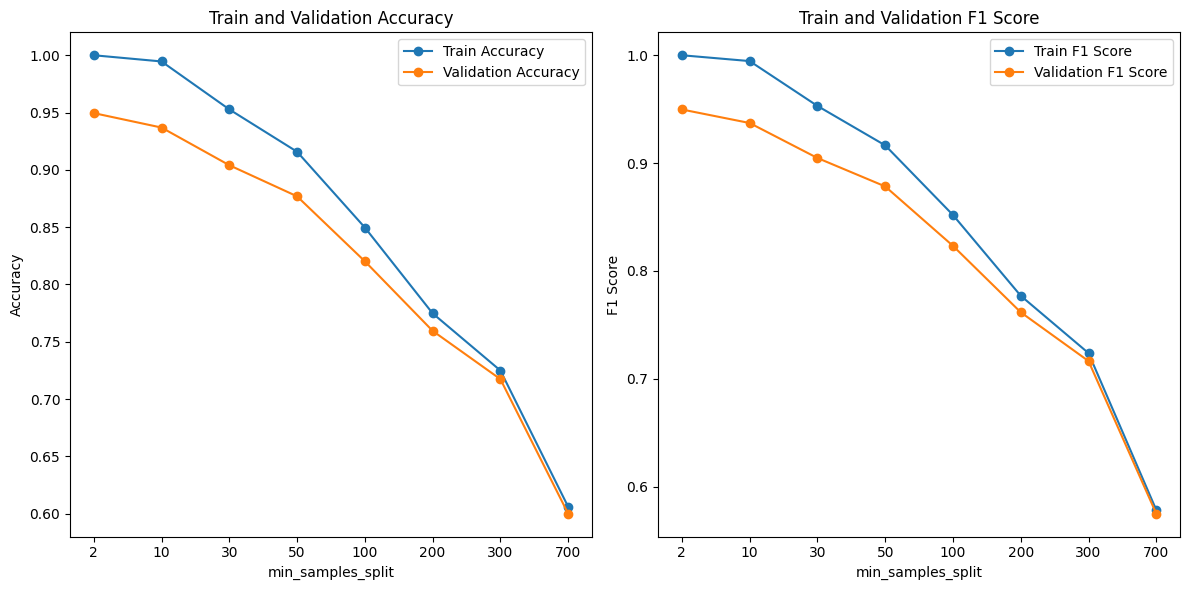

In [7]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score
import matplotlib.pyplot as plt

# Range of min_samples_split
min_samples_split_list = [2, 10, 30, 50, 100, 200, 300, 700]

# Lists to store evaluation metrics
evaluation_list_train = []
evaluation_list_val = []

# Train and evaluate models for different min_samples_split values
for min_samples_split in min_samples_split_list:
    model = RandomForestClassifier(min_samples_split=min_samples_split, random_state=42)
    model.fit(X_train, y_train)

    predictions_train = model.predict(X_train)
    predictions_val = model.predict(X_val)

    accuracy_train = accuracy_score(y_train, predictions_train)
    accuracy_val = accuracy_score(y_val, predictions_val)

    f1_train = f1_score(y_train, predictions_train, average="weighted")
    f1_val = f1_score(y_val, predictions_val, average="weighted")

    evaluation_list_train.append((accuracy_train, f1_train))
    evaluation_list_val.append((accuracy_val, f1_val))

# Separate accuracy and F1 scores for plotting
accuracy_train_list, f1_train_list = zip(*evaluation_list_train)
accuracy_val_list, f1_val_list = zip(*evaluation_list_val)

# Plot accuracy and F1 scores
plt.figure(figsize=(12, 6))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.title("Train and Validation Accuracy")
plt.xlabel("min_samples_split")
plt.ylabel("Accuracy")
plt.xticks(ticks=range(len(min_samples_split_list)), labels=min_samples_split_list)
plt.plot(accuracy_train_list, marker="o", label="Train Accuracy")
plt.plot(accuracy_val_list, marker="o", label="Validation Accuracy")
plt.legend()

# Plot F1 scores
plt.subplot(1, 2, 2)
plt.title("Train and Validation F1 Score")
plt.xlabel("min_samples_split")
plt.ylabel("F1 Score")
plt.xticks(ticks=range(len(min_samples_split_list)), labels=min_samples_split_list)
plt.plot(f1_train_list, marker="o", label="Train F1 Score")
plt.plot(f1_val_list, marker="o", label="Validation F1 Score")
plt.legend()

# Show plots
plt.tight_layout()
plt.show()

We can see in above plots that as **min_samples_split** increases, both **training accuracy** and **F1 score** show a declining trend, indicating reduced model complexity and increasing generalization. Initially, the model exhibits high **accuracy** and **F1 score** for training data but experiences a moderate drop in validation performance, which suggests moderate over-fitting at lower values. As the hyperparameter increases, the gap between **training** and **validation** metrics narrows, showing improved generalization but decreased overall performance.

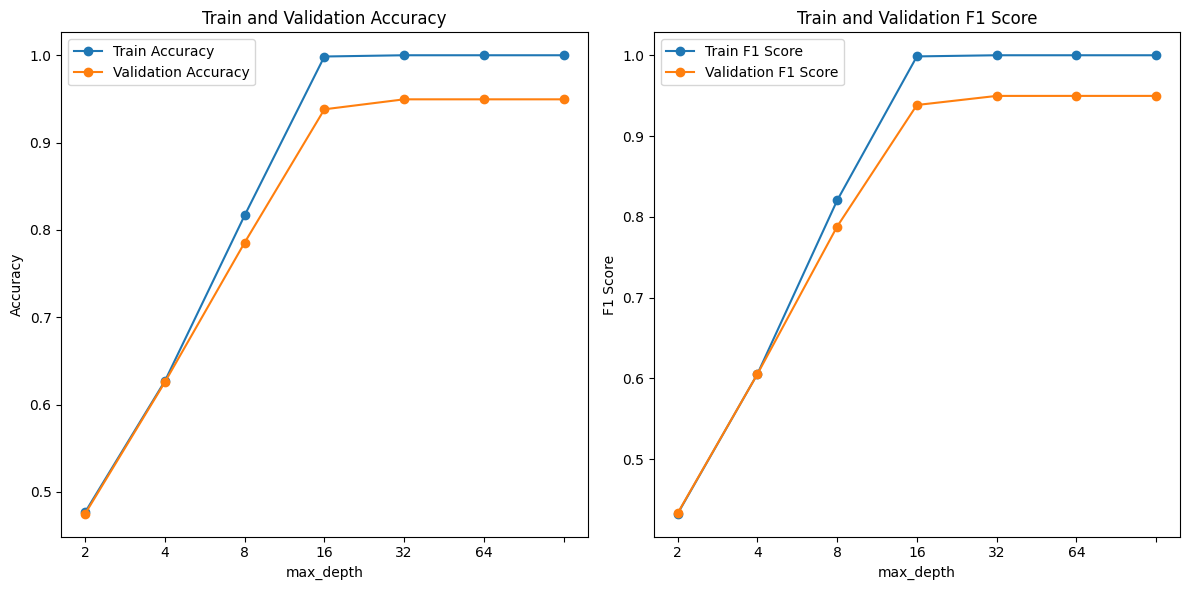

In [8]:
# Range of max_depth
max_depth_list = [2, 4, 8, 16, 32, 64, None]

# Lists to store evaluation metrics
evaluation_list_train_ = []
evaluation_list_val_ = []

# Train and evaluate models for different max_depth values
for max_depth in max_depth_list:
    model = RandomForestClassifier(max_depth=max_depth, random_state=42)
    model.fit(X_train, y_train)

    predictions_train = model.predict(X_train)
    predictions_val = model.predict(X_val)

    accuracy_train = accuracy_score(y_train, predictions_train)
    accuracy_val = accuracy_score(y_val, predictions_val)

    f1_train = f1_score(y_train, predictions_train, average="weighted")
    f1_val = f1_score(y_val, predictions_val, average="weighted")

    evaluation_list_train_.append((accuracy_train, f1_train))
    evaluation_list_val_.append((accuracy_val, f1_val))

# Separate accuracy and F1 scores for plotting
accuracy_train_list_, f1_train_list_ = zip(*evaluation_list_train_)
accuracy_val_list_, f1_val_list_ = zip(*evaluation_list_val_)

# Plot accuracy and F1 scores
plt.figure(figsize=(12, 6))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.title("Train and Validation Accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.xticks(ticks=range(len(max_depth_list)), labels=max_depth_list)
plt.plot(accuracy_train_list_, marker="o", label="Train Accuracy")
plt.plot(accuracy_val_list_, marker="o", label="Validation Accuracy")
plt.legend()

# Plot F1 scores
plt.subplot(1, 2, 2)
plt.title("Train and Validation F1 Score")
plt.xlabel("max_depth")
plt.ylabel("F1 Score")
plt.xticks(ticks=range(len(max_depth_list)), labels=max_depth_list)
plt.plot(f1_train_list_, marker="o", label="Train F1 Score")
plt.plot(f1_val_list_, marker="o", label="Validation F1 Score")
plt.legend()

# Show plots
plt.tight_layout()
plt.show()

The plots above show the impact of varying **max_depth** on the Random Forest model's performance in terms of **accuracy** and **F1 score** for both the training and validation sets. As **max_depth** increases, the **training accuracy** and **F1 score** rapidly improve, reaching 100% at higher depths, indicating a potential risk of **overfitting**. The **validation metrics**, however, show a more gradual increase, plateauing after a certain point (around **32 and forward for max_depth**). This suggests that increasing **max_depth** beyond a certain threshold no longer provides additional benefit for the **validation performance**, pointing to diminishing returns and a good balance between **model complexity** and **generalization**.

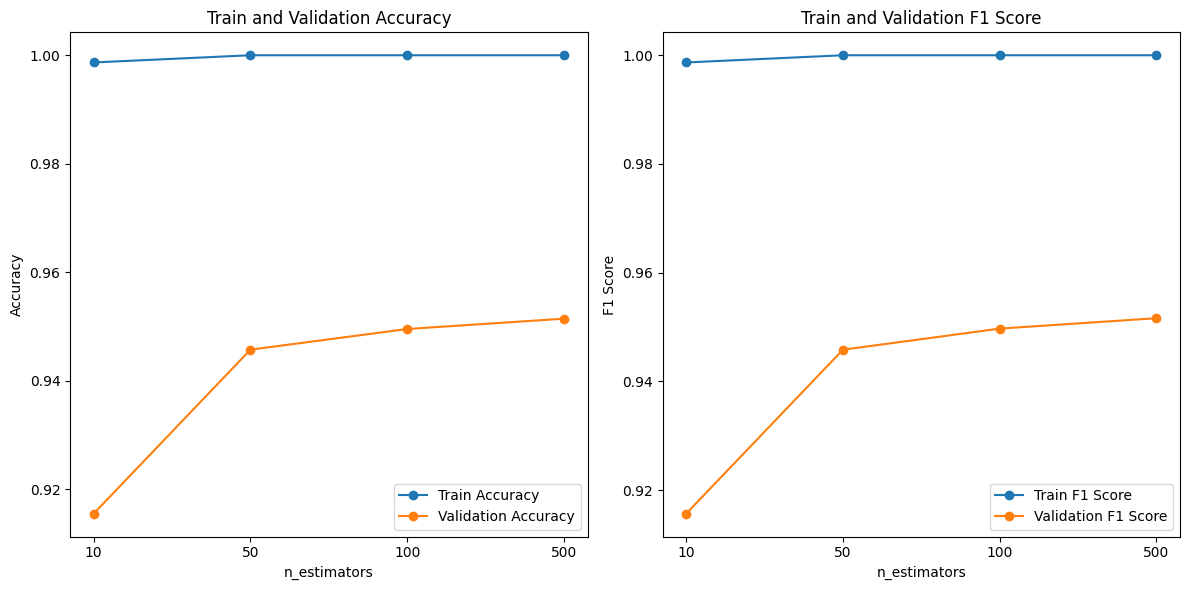

In [9]:
# Range of n_estimators
n_estimators_list = [10, 50, 100, 500]

# Lists to store evaluation metrics
evaluation_list_train__ = []
evaluation_list_val__ = []

# Train and evaluate models for different n_estimators values
for n_estimators in n_estimators_list:
    model = RandomForestClassifier(n_estimators=n_estimators, random_state=42)
    model.fit(X_train, y_train)

    predictions_train = model.predict(X_train)
    predictions_val = model.predict(X_val)

    accuracy_train = accuracy_score(y_train, predictions_train)
    accuracy_val = accuracy_score(y_val, predictions_val)

    f1_train = f1_score(y_train, predictions_train, average="weighted")
    f1_val = f1_score(y_val, predictions_val, average="weighted")

    evaluation_list_train__.append((accuracy_train, f1_train))
    evaluation_list_val__.append((accuracy_val, f1_val))

# Separate accuracy and F1 scores for plotting
accuracy_train_list__, f1_train_list__ = zip(*evaluation_list_train__)
accuracy_val_list__, f1_val_list__ = zip(*evaluation_list_val__)

# Plot accuracy and F1 scores
plt.figure(figsize=(12, 6))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.title("Train and Validation Accuracy")
plt.xlabel("n_estimators")
plt.ylabel("Accuracy")
plt.xticks(ticks=range(len(n_estimators_list)), labels=n_estimators_list)
plt.plot(accuracy_train_list__, marker="o", label="Train Accuracy")
plt.plot(accuracy_val_list__, marker="o", label="Validation Accuracy")
plt.legend()

# Plot F1 scores
plt.subplot(1, 2, 2)
plt.title("Train and Validation F1 Score")
plt.xlabel("n_estimators")
plt.ylabel("F1 Score")
plt.xticks(ticks=range(len(n_estimators_list)), labels=n_estimators_list)
plt.plot(f1_train_list__, marker="o", label="Train F1 Score")
plt.plot(f1_val_list__, marker="o", label="Validation F1 Score")
plt.legend()

# Show plots
plt.tight_layout()
plt.show()

The above plots show that while **training accuracy** and **F1 score** remain close to 1.0, the increase in **n_estimators** beyond **50** results in gradual improvement in **validation metrics**. This indicates that increasing the number of estimators enhances performance, albeit marginally. Thus, though the gains are small, more estimators continue to provide slight improvements in generalization.

Based on the above evaluations of Random Forest models on hyperparameters like **min_samples_split**, **max_depth**, and **n_estimators**, the optimal value for **n_estimators** is chosen to be **500**. However, for **max_depth** we will use two values: **32** & **8**, and for **min_samples_split**, we will use three values: **50**, **30**, and **10**, and compare the results. We will then select the one that gives the best and balanced results as the optimal value for **max_depth** and **min_samples_split**.

In [14]:
models = {}

# Train and evaluate models for chosen max_depth and min_samples_split values
i = 1
for max_depth in [32, 8]:
    for min_samples_split in [50, 30, 10]:
        model = RandomForestClassifier(min_samples_split=min_samples_split,
                                       max_depth=max_depth,
                                       n_estimators=500,
                                       random_state=42).fit(X_train, y_train)

        # Predictions for training and validation
        predictions_train = model.predict(X_train)
        predictions_val = model.predict(X_val)

        # Calculate accuracy and F1 score for training and validation
        accuracy_train = accuracy_score(y_train, predictions_train)
        accuracy_val = accuracy_score(y_val, predictions_val)

        f1_train = f1_score(y_train, predictions_train, average="weighted")
        f1_val = f1_score(y_val, predictions_val, average="weighted")

        # Print the evaluation metrics
        print(f"Model: {i}, min_samples_split = {min_samples_split}, max_depth = {max_depth}")
        print(f"Train Accuracy: {accuracy_train:.4f} | Train F1 Score: {f1_train:.4f}")
        print(f"Validation Accuracy: {accuracy_val:.4f} | Validation F1 Score: {f1_val:.4f}\n")

        # Save the model in models dictionary
        models[i] = model

        i+= 1

Model: 1, min_samples_split = 50, max_depth = 32
Train Accuracy: 0.9209 | Train F1 Score: 0.9215
Validation Accuracy: 0.8786 | Validation F1 Score: 0.8799

Model: 2, min_samples_split = 30, max_depth = 32
Train Accuracy: 0.9559 | Train F1 Score: 0.9561
Validation Accuracy: 0.9029 | Validation F1 Score: 0.9035

Model: 3, min_samples_split = 10, max_depth = 32
Train Accuracy: 0.9958 | Train F1 Score: 0.9958
Validation Accuracy: 0.9386 | Validation F1 Score: 0.9389

Model: 4, min_samples_split = 50, max_depth = 8
Train Accuracy: 0.7985 | Train F1 Score: 0.8003
Validation Accuracy: 0.7736 | Validation F1 Score: 0.7752

Model: 5, min_samples_split = 30, max_depth = 8
Train Accuracy: 0.8103 | Train F1 Score: 0.8123
Validation Accuracy: 0.7795 | Validation F1 Score: 0.7812

Model: 6, min_samples_split = 10, max_depth = 8
Train Accuracy: 0.8299 | Train F1 Score: 0.8327
Validation Accuracy: 0.7945 | Validation F1 Score: 0.7970



**Model 3**, with a **min_samples_split** of **10** and **max_depth** of **32**, emerges as the optimal and balanced choice among the Random Forest models evaluated. It achieves a good balance between high performance on both the training and validation sets. With a validation accuracy of **93.86%** and an F1 score of **93.89%**, it demonstrates good generalization without significant overfitting. Although **Model 2** also performs well, **Model 3** strikes a better trade-off between learning complexity and predictive power, avoiding overly simplified or overly complex decision boundaries. This makes it the most reliable for consistent performance across unseen data, offering robust accuracy and F1 scores while maintaining generalization across both metrics.


In [18]:
# Retrieve the optimal Random Forest model (Model 3) based on previous evaluation
random_forest_model = models.get(3)

# Make predictions on the test dataset using the selected model
predictions_test = random_forest_model.predict(X_test)

# Calculate the accuracy of the model on the test set
accuracy_test = accuracy_score(y_test, predictions_test)

# Calculate the weighted F1 score on the test set
f1_test = f1_score(y_test, predictions_test, average="weighted")

# Print the test accuracy and F1 score
print(f"Test Accuracy: {accuracy_test:.4f} | Test F1 Score: {f1_test:.4f}")

Test Accuracy: 0.9468 | Test F1 Score: 0.9469


The **Test Accuracy** of **94.68%** and **Test F1 Score** of **94.69%** affirm the effectiveness of **Model 3** in delivering good predictions on unseen data. Its reliable performance across training, validation, and test sets highlights its capability to generalize well without severe overfitting, making it a good solution for this classification problem. With these results, we can conclude that the Random Forest model-building process has been successfully completed.